**UTS VISUALISASI DATA**

DWI MIFTAHUSSALAMAH

2110631170010

## IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## LOAD DATASET

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
# menampilkan kolom

print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


## PRE-PROCESSING

### HANDLING MISSING VALUE

In [ ]:
print("Missing values pada setiap kolom:\n", df.isnull().sum())

Missing values pada setiap kolom:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# menghapus missing value pada kolom name dan host_name

df.dropna(subset=['name', 'host_name'], inplace=True)
print("Missing values pada setiap kolom setelah dihapus:\n", df.isnull().sum())

Missing values pada setiap kolom setelah dihapus:
 id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Mengatasi missing values pada kolom 'last_review' dengan nilai default (contoh: '1970-01-01')
df['last_review'].fillna('1970-01-01', inplace=True)

# Mengatasi missing values pada kolom 'reviews_per_month' dengan nilai 0
df['reviews_per_month'].fillna(0, inplace=True)

# Verifikasi setelah mengisi missing values
missing_values_after = df.isnull().sum()
missing_values_after = df
df.head(3)

<ipython-input-216-623511ad8f66>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna('1970-01-01', inplace=True)
<ipython-input-216-623511ad8f66>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1970-01-01,0.00,1,365


In [ ]:
print("Missing values pada setiap kolom:\n", df.isnull().sum())

Missing values pada setiap kolom:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


### CHECKING DUPLICATE

In [ ]:
# Cek duplikat pada seluruh dataframe
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
  print("Terdapat data duplikat:")
  print(duplicate_rows)
else:
  print("Tidak terdapat data duplikat.")

Tidak terdapat data duplikat.


## SUMMARY OF DATASET

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     48858

In [ ]:
# Summary of the dataset
summary = df.describe()
print(summary)

                 id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48858.000000       48858.000000       48858.000000   
mean         7.012444          23.273098           1.091124   
std         20.019757          44.549898           1.597270   
min          1.000000           0.00

## EXPLORATORY DATA ANALYST (EDA)

### HARGA

In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


<Figure size 1000x600 with 0 Axes>

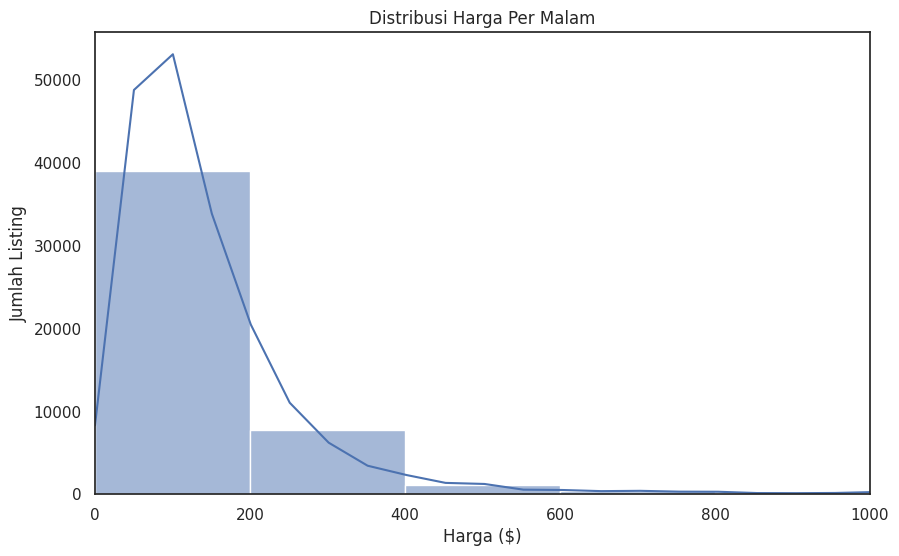

In [ ]:
# Distribusi Harga Per Malam

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga Per Malam')
plt.xlabel('Harga ($)')
plt.ylabel('Jumlah Listing')
plt.xlim(0, 1000)  # Membatasi rentang harga untuk visualisasi yang lebih baik
plt.show()

### TIPE KAMAR

<ipython-input-223-b216a58948a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='Set2')


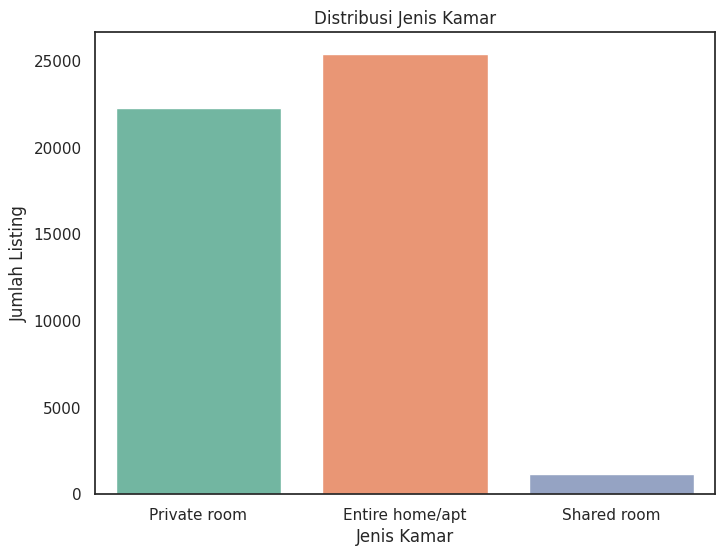

In [ ]:
# Distribusi Jenis Kamar

plt.figure(figsize=(8,6))
sns.countplot(x='room_type', data=df, palette='Set2')
plt.title('Distribusi Jenis Kamar')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Listing')
plt.show()

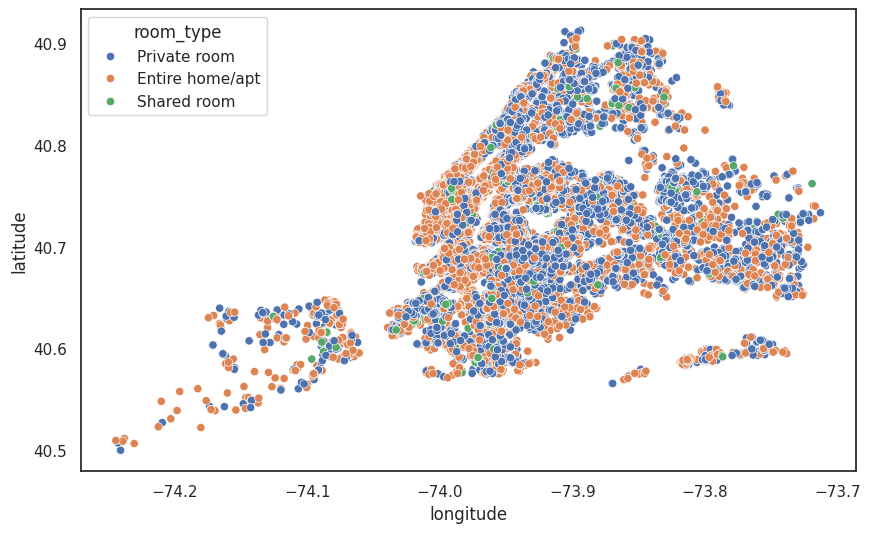

In [ ]:
# Distribusi geografis berdasarkan jenis kaamar

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df)
plt.ioff()

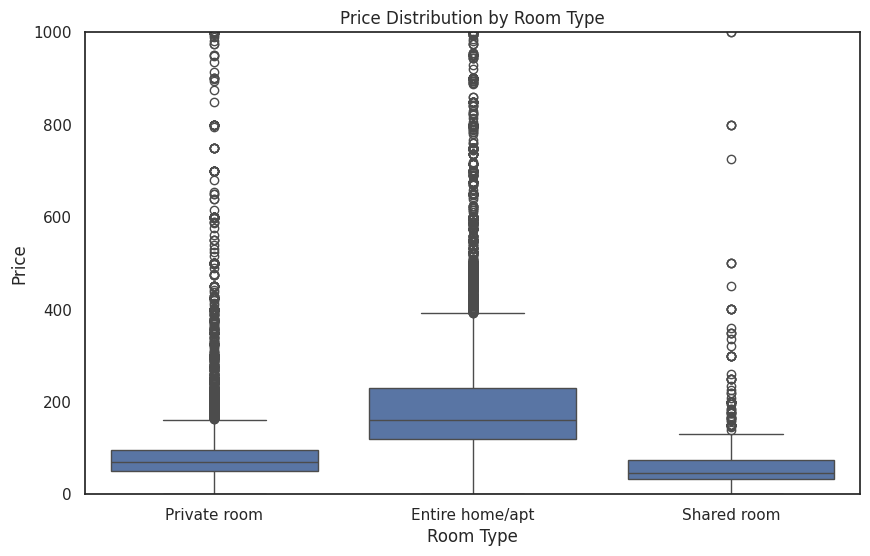

In [ ]:
# Distribusi Harga berdasarkan tipe kamar

plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 1000)  # Limiting the y-axis for better visibility
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### NEIGHBOURHOOD GROUP

In [ ]:
# Data unik pada neighbourhood_group

df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

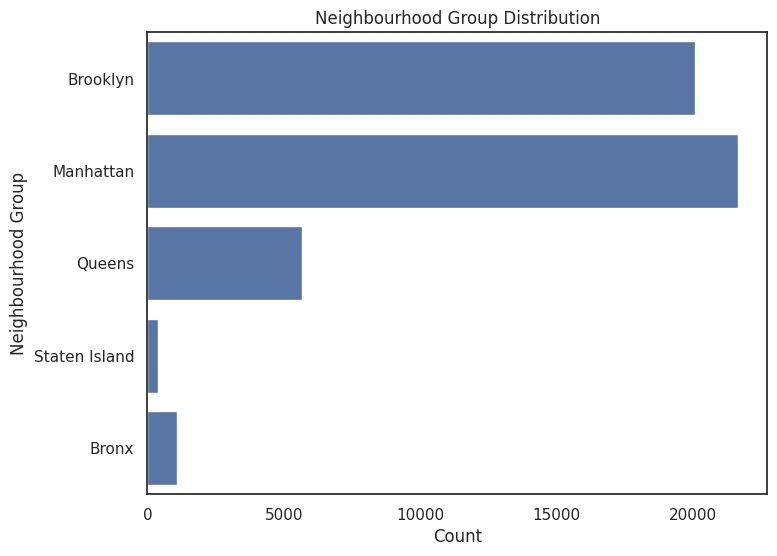

In [ ]:
# Distribusi Neighbourhood group

plt.figure(figsize=(8, 6))
sns.countplot(y='neighbourhood_group', data=df)
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Count')
plt.ylabel('Neighbourhood Group')
plt.show()

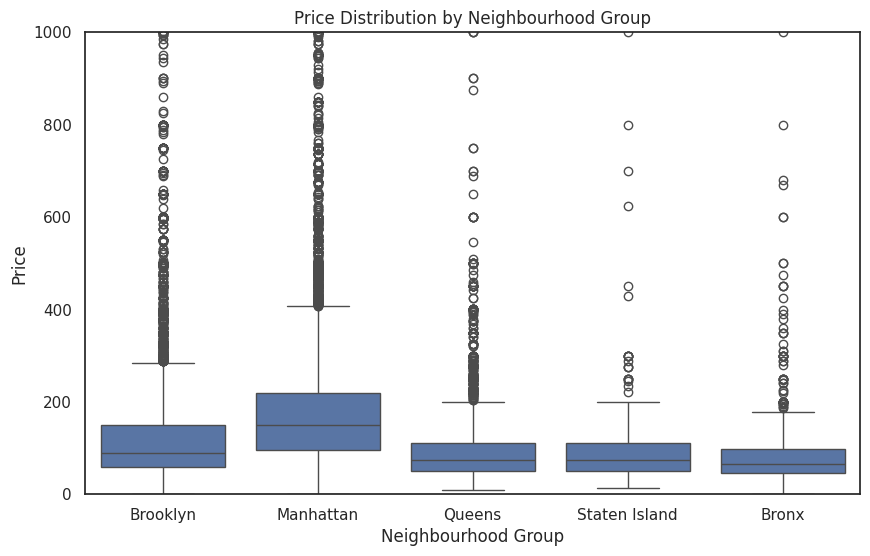

In [ ]:
# Distribusi Harga per neighbourhood group

plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.ylim(0, 1000)  # Limiting the y-axis for better visibility
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

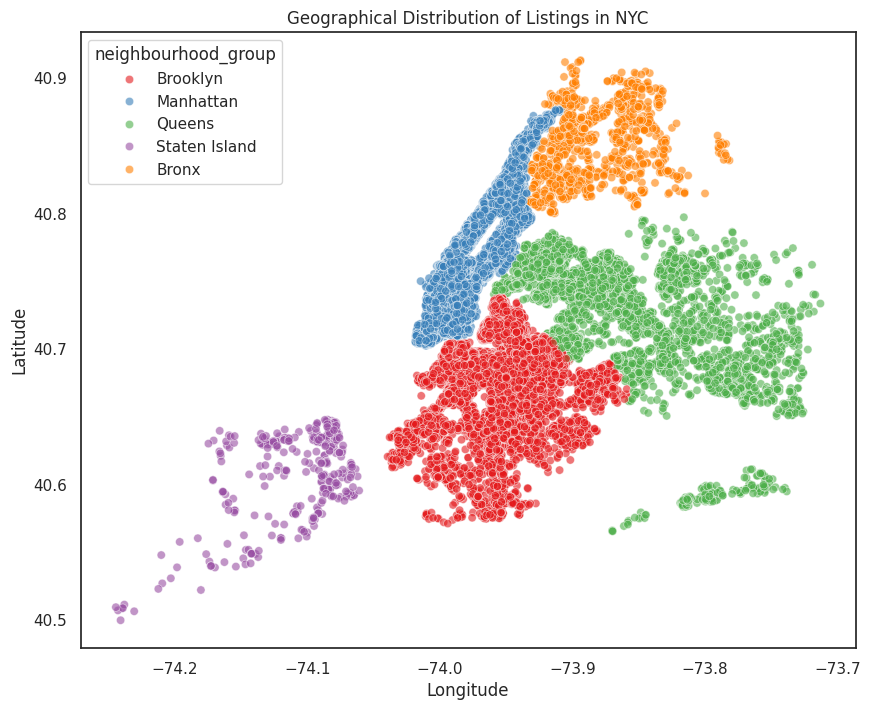

In [ ]:
# Distribusi geografis listing berdasarkan Neighbourhood group

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, palette='Set1', alpha=0.6)
plt.title('Geographical Distribution of Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### HOST

In [ ]:
# Top 10 host

top_host=df.host_id.value_counts().head(10)
top_host

,count
host_id,
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65


In [ ]:
# jumlah listing oleh host

top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

### NEIGHBOURHOODS

In [ ]:
 # Top 10 neighbourhood

 df.groupby(['neighbourhood_group', 'neighbourhood']).size().sort_values(ascending=False).head(10)

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3917
                     Bedford-Stuyvesant    3713
Manhattan            Harlem                2655
Brooklyn             Bushwick              2462
Manhattan            Upper West Side       1969
                     Hell's Kitchen        1954
                     East Village          1852
                     Upper East Side       1797
Brooklyn             Crown Heights         1563
Manhattan            Midtown               1545
dtype: int64

### NUMBER OF REVIEWS

In [ ]:
# Top 10 reviewed listings in NYC

top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


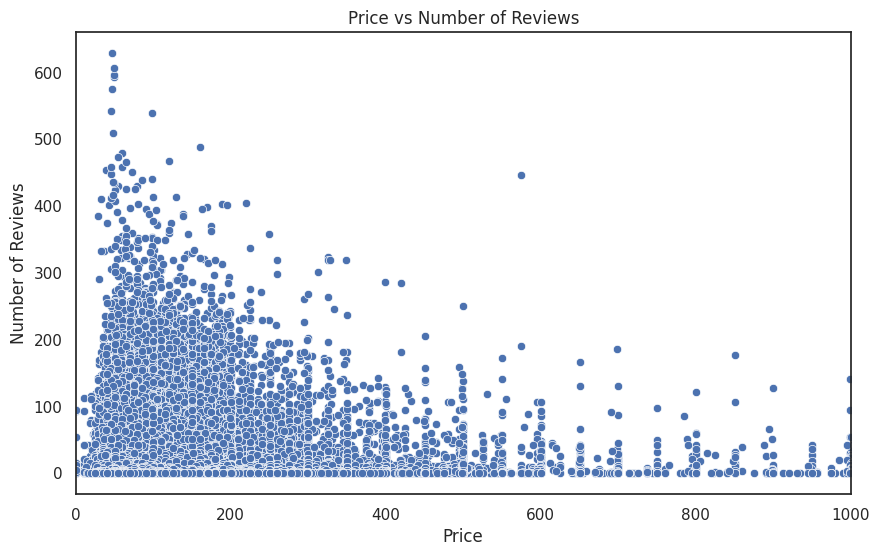

In [ ]:
# Hubungan antara harga dan jumlah ulasan

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df)
plt.xlim(0, 1000)  # Limiting x-axis for better visibility
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

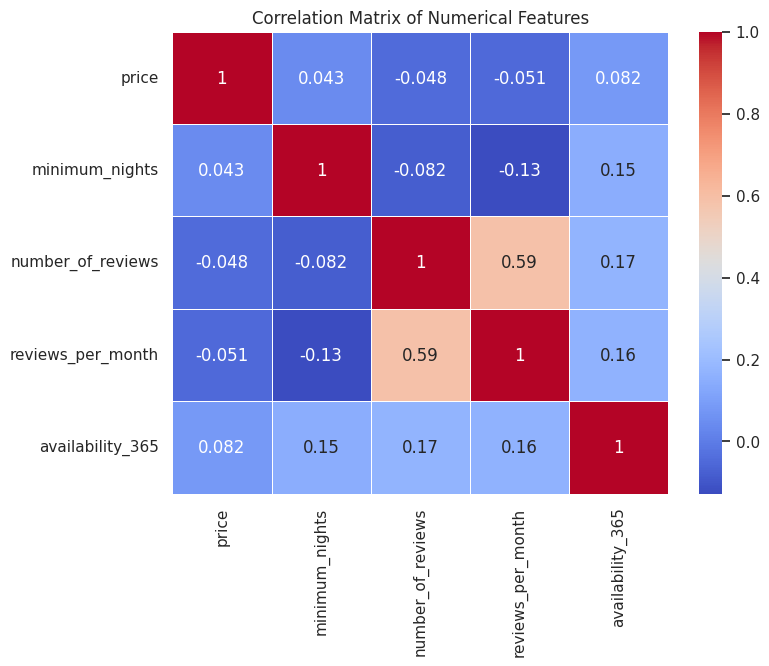

In [ ]:
# Korelasi antar variabel numerik

corr_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()